# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fiyanda Ma'muri
- **Email:** fiyandamamuri@gmail.com
- **ID Dicoding:** fiyandamamuri

## Menentukan Pertanyaan Bisnis
- Pertanyaan 1 : Bagaimana distribusi pelanggan per kota selama periode data yang tersedia (2016-2018), dan apakah terjadi perubahan signifikan di 5 kota teratas dibandingkan dengan kota lainnya?

- Pertanyaan 2 : Bagaimana tren penggunaan metode pembayaran pelanggan dari tahun 2016-2018, dan metode mana yang memberikan kontribusi terbesar terhadap total transaksi?

- Pertanyaan 3 : Bagaimana tren jumlah pesanan per bulan selama periode 2016–2018, dan apakah terdapat pola musiman atau perubahan signifikan yang dapat menjadi dasar strategi promosi dan pengelolaan inventaris?

- Pertanyaan 4 : Kategori produk apa yang paling populer selama tahun 2024, dan bagaimana perubahannya dibandingkan dengan tahun sebelumnya?

- Pertanyaan 5 : Berapa rata-rata waktu pengiriman (dari pembelian hingga diterima pelanggan) selama periode 2016–2018, dan apakah terdapat perbedaan signifikan antar kota atau wilayah?

- Pertanyaan 6 : Bagaimana distribusi skor ulasan pelanggan, dan apakah terdapat hubungan antara review_score dengan waktu pengiriman atau nilai transaksi?

- Pertanyaan 7 : Siapa saja penjual dengan total penjualan tertinggi, dan bagaimana rata-rata waktu pengiriman mereka dibandingkan dengan penjual lain?

- Pertanyaan 8 : Berapa proporsi pelanggan baru vs pelanggan yang melakukan pembelian ulang selama periode 2016–2018?

- Pertanyaan 9 : Bagaimana performa penjualan dan rata-rata nilai transaksi per negara bagian (state), dan area mana yang paling berkontribusi terhadap total revenue?

- Pertanyaan 10 : Bagaimana segmentasi pelanggan berdasarkan nilai Recency, Frequency, dan Monetary selama periode 2016–2018, dan segmen pelanggan mana yang paling berpotensi untuk program retensi atau promosi loyalitas?

## Import Packages/Library

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
order_items = pd.read_csv('datasets/order_items_dataset.csv')
order_items.info()
order_items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**order_items_dataset**

| Kolom                 | Deskripsi                                    |
| --------------------- | -------------------------------------------- |
| `order_id`            | ID pesanan (menghubungkan ke tabel `orders`) |
| `order_item_id`       | Urutan item dalam satu pesanan (1, 2, dst.)  |
| `product_id`          | ID produk yang dibeli                        |
| `seller_id`           | ID penjual yang menjual produk tersebut      |
| `shipping_limit_date` | Batas waktu penjual untuk mengirim produk    |
| `price`               | Harga produk (tanpa ongkir)                  |
| `freight_value`       | Biaya pengiriman untuk item tersebut         |



In [3]:
order_reviews = pd.read_csv("datasets/order_reviews_dataset.csv")
order_reviews.info()
order_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**order_reviews_datasets**

| Kolom                     | Deskripsi                                     |
| ------------------------- | --------------------------------------------- |
| `review_id`               | ID unik untuk setiap ulasan pelanggan         |
| `order_id`                | ID pesanan yang diulas                        |
| `review_score`            | Skor ulasan (1–5)                             |
| `review_comment_title`    | Judul singkat ulasan pelanggan                |
| `review_comment_message`  | Isi komentar atau ulasan pelanggan            |
| `review_creation_date`    | Tanggal ulasan dibuat                         |
| `review_answer_timestamp` | Tanggal sistem merespons atau mencatat ulasan |


In [4]:
orders = pd.read_csv("datasets/orders_dataset.csv")
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**orders_dataset**

| Kolom                           | Deskripsi                                           |
| ------------------------------- | --------------------------------------------------- |
| `order_id`                      | ID unik untuk setiap pesanan pelanggan              |
| `customer_id`                   | ID unik untuk pelanggan yang melakukan pesanan      |
| `order_status`                  | Status pesanan (delivered, shipped, canceled, dll.) |
| `order_purchase_timestamp`      | Tanggal & waktu pesanan dibuat oleh pelanggan       |
| `order_approved_at`             | Tanggal & waktu pesanan disetujui oleh sistem       |
| `order_delivered_carrier_date`  | Tanggal pesanan dikirim ke ekspedisi                |
| `order_delivered_customer_date` | Tanggal pesanan diterima oleh pelanggan             |
| `order_estimated_delivery_date` | Estimasi tanggal pesanan akan diterima pelanggan    |


In [5]:
products = pd.read_csv("datasets/products_dataset.csv")
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**products_dataset**

| Kolom                        | Deskripsi                                    |
| ---------------------------- | -------------------------------------------- |
| `product_id`                 | ID produk                                    |
| `product_category_name`      | Nama kategori produk (dalam bahasa Portugis) |
| `product_name_lenght`        | Panjang nama produk (jumlah karakter)        |
| `product_description_lenght` | Panjang deskripsi produk                     |
| `product_photos_qty`         | Jumlah foto produk                           |
| `product_weight_g`           | Berat produk (gram)                          |
| `product_length_cm`          | Panjang produk (cm)                          |
| `product_height_cm`          | Tinggi produk (cm)                           |
| `product_width_cm`           | Lebar produk (cm)                            |


In [6]:
geolocation = pd.read_csv("datasets/geolocation_dataset.csv")
geolocation.info()
geolocation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**geolocation_dataset**

| Kolom                         | Deskripsi                     |
| ----------------------------- | ----------------------------- |
| `geolocation_zip_code_prefix` | Kode pos wilayah              |
| `geolocation_lat`             | Koordinat lintang (latitude)  |
| `geolocation_lng`             | Koordinat bujur (longitude)   |
| `geolocation_city`            | Nama kota                     |
| `geolocation_state`           | Kode negara bagian (provinsi) |


In [7]:
sellers = pd.read_csv("datasets/sellers_dataset.csv")
sellers.info()
sellers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**sellers_dataset**

| Kolom                    | Deskripsi                        |
| ------------------------ | -------------------------------- |
| `seller_id`              | ID unik untuk setiap penjual     |
| `seller_zip_code_prefix` | Kode pos penjual                 |
| `seller_city`            | Kota tempat penjual berada       |
| `seller_state`           | Negara bagian (provinsi) penjual |


In [8]:
order_payments = pd.read_csv("datasets/order_payments_dataset.csv")
order_payments.info()
order_payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**order_payments**

| Kolom                  | Deskripsi                                             |
| ---------------------- | ----------------------------------------------------- |
| `order_id`             | ID pesanan (relasi ke `orders`)                       |
| `payment_sequential`   | Urutan pembayaran untuk satu pesanan                  |
| `payment_type`         | Jenis pembayaran (credit_card, boleto, voucher, dll.) |
| `payment_installments` | Jumlah cicilan pembayaran                             |
| `payment_value`        | Total nilai pembayaran (termasuk biaya tambahan)      |


In [9]:
customers = pd.read_csv("datasets/customers_dataset.csv")
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**customers_dataset**

| Kolom                      | Deskripsi                                                                              |
| -------------------------- | -------------------------------------------------------------------------------------- |
| `customer_id`              | ID pelanggan (relasi ke tabel `orders`)                                                |
| `customer_unique_id`       | ID unik untuk pelanggan di seluruh pesanan (pelanggan bisa punya banyak `customer_id`) |
| `customer_zip_code_prefix` | Kode pos pelanggan                                                                     |
| `customer_city`            | Kota tempat pelanggan tinggal                                                          |
| `customer_state`           | Negara bagian (provinsi) pelanggan                                                     |


In [10]:
product_category_name_translation = pd.read_csv("datasets/product_category_name_translation.csv")
product_category_name_translation.info()
product_category_name_translation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**product_category_name_translation**

| Kolom                           | Deskripsi                              |
| ------------------------------- | -------------------------------------- |
| `product_category_name`         | Nama kategori produk (bahasa Portugis) |
| `product_category_name_english` | Nama kategori produk (bahasa Inggris)  |


In [11]:
# Menggabungkan data dari beberapa tabel
merged_data = order_items.merge(orders, on='order_id', how='left') \
    .merge(order_reviews, on='order_id', how='left') \
    .merge(products, on='product_id', how='left') \
    .merge(customers, on='customer_id', how='left') \
    .merge(order_payments, on='order_id', how='left') \
    .merge(sellers, on='seller_id', how='left') \
    .merge(product_category_name_translation, left_on='product_category_name', right_on='product_category_name', how='left')

In [12]:
merged_data.info()
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   customer_id                    118310 non-null  object 
 8   order_status                   118310 non-null  object 
 9   order_purchase_timestamp       118310 non-null  object 
 10  order_approved_at              118295 non-null  object 
 11  order_delivered_carrier_date   117056 non-null  object 
 12  order_delivered_customer_date 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,27277,volta redonda,SP,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,3471,sao paulo,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,37564,borda da mata,MG,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,14403,franca,SP,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,87900,loanda,PR,garden_tools


### Assessing Data

In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   customer_id                    118310 non-null  object 
 8   order_status                   118310 non-null  object 
 9   order_purchase_timestamp       118310 non-null  object 
 10  order_approved_at              118295 non-null  object 
 11  order_delivered_carrier_date   117056 non-null  object 
 12  order_delivered_customer_date 

In [14]:
# Mengecek missing values
missing_values = merged_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
review_id                           978
review_score                        978
review_comment_title             104418
review_comment_message            68628
review_creation_date                978
review_answer_timestamp             978
product_category_name              1709
product_name_lenght                1709
product_description_lenght         1709
product_photos_qty                 1709
product_

In [15]:
# mengecek kolom unik order_status
unique_order_status = merged_data['order_status'].unique()
print("Unique values in 'order_status':", unique_order_status)

Unique values in 'order_status': ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'approved'
 'unavailable']


In [16]:
# mengecek jumlah data unavailable order_status
unavailable_order_status_count = merged_data[merged_data['order_status'] == 'unavailable'].shape[0]
print("Number of 'unavailable' order_status:", unavailable_order_status_count)

Number of 'unavailable' order_status: 7


In [17]:
# mengecek 5 data dari seluruh kolom yang product_category_name adalah NaN
missing_category_data = merged_data[merged_data['product_category_name'].isnull()].head()
missing_category_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
126,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,ae55e228ded796581eccc67045516023,delivered,2017-09-26 15:24:03,2017-09-26 15:49:17,2017-09-28 18:42:42,2017-09-29 18:29:50,2017-10-11 00:00:00,219cb56781473bd4ee7023459372d25c,5.0,NaN,NaN,2017-09-30 00:00:00,2017-10-02 00:13:27,NaN,NaN,NaN,NaN,200.0,16.0,5.0,12.0,b0efd7adeb04d15b16edaedd11215d40,2712,sao paulo,SP,1.0,credit_card,1.0,15.57,4763,sao paulo,SP,NaN
128,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,baa4ed05f22ffb6c4a41b71b699a492c,delivered,2017-02-13 16:18:07,2017-02-14 03:42:56,2017-02-14 08:32:53,2017-02-15 11:35:56,2017-03-10 00:00:00,c13699f8e389acea5f406e527f0edfb3,5.0,NaN,NaN,2017-02-16 00:00:00,2017-02-17 10:32:17,NaN,NaN,NaN,NaN,700.0,35.0,14.0,11.0,d4c784ecad19dfe09e63ffaf9ada82a3,36050,juiz de fora,MG,1.0,boleto,1.0,18.56,36046,juiz de fora,MG,NaN
135,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61,a69c820c317aa348d781a9d6732afc23,delivered,2018-02-27 12:16:30,2018-02-28 09:29:25,2018-02-28 20:48:42,2018-03-23 00:52:43,2018-03-21 00:00:00,23e790c68acbe511dd7b94c6707f2e41,3.0,NaN,NaN,2018-03-23 00:00:00,2018-03-23 10:19:03,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0,17726716a98c98a7806b43a789820245,79304,corumba,MS,1.0,boleto,1.0,138.60,7133,guarulhos,SP,NaN
145,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79,c664dc5de5b5f4184bc4ca0285b9f8fe,delivered,2018-01-18 17:05:30,2018-01-20 09:07:51,2018-01-23 14:33:54,2018-02-06 20:07:20,2018-02-20 00:00:00,a96a757f169ded9f72fc4f3c03750d60,4.0,NaN,NaN,2018-02-07 00:00:00,2018-02-08 11:17:47,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0,9a5b186787a143669398bd8083720c21,78550,sinop,MT,1.0,boleto,1.0,37.09,13483,limeira,SP,NaN
174,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14,97dc92f1aae3a7db8b252d1b8466910e,delivered,2018-02-17 14:22:34,2018-02-17 14:35:28,2018-02-20 19:08:00,2018-02-25 13:46:52,2018-03-13 00:00:00,304aaea0a61ca9e8c661cc7a403be82f,5.0,NaN,NaN,2018-02-26 00:00:00,2018-02-26 17:00:30,NaN,NaN,NaN,NaN,2200.0,16.0,2.0,11.0,d5faae3f913e775994e53068992969b5,70670,brasilia,DF,1.0,credit_card,3.0,70.14,3306,sao paulo,SP,NaN


In [18]:
# Cek proporsi missing values pada kolom product_category_name
merged_data['product_category_name'].isna().mean() * 100

np.float64(1.4445101851069226)

In [19]:
# Mengecek jumlah duplikat
duplicate_count = merged_data.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [20]:
# Mengecek inconsistencies atau format tidak standar
inconsistent_formats = merged_data.select_dtypes(include=['object']).apply(lambda x: x.str.contains(r'[^a-zA-Z0-9\s]', na=False))
inconsistent_formats.sum()

order_id                              0
product_id                            0
seller_id                             0
shipping_limit_date              118310
customer_id                           0
order_status                          0
order_purchase_timestamp         118310
order_approved_at                118295
order_delivered_carrier_date     117056
order_delivered_customer_date    115722
order_estimated_delivery_date    118310
review_id                             0
review_comment_title               4428
review_comment_message            40133
review_creation_date             117332
review_answer_timestamp          117332
product_category_name             87288
customer_unique_id                    0
customer_city                       538
customer_state                        0
payment_type                      88957
seller_city                        1070
seller_state                          0
product_category_name_english     81716
dtype: int64

In [21]:
# Statistik deskriptif untuk kolom numerik  
numeric_descriptive_stats = merged_data.describe()
numeric_descriptive_stats

,order_item_id,price,freight_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,118310.000000,118310.000000,118310.000000,117332.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118307.000000,118307.000000,118307.000000,118310.000000
mean,1.196543,120.646603,20.032387,4.031390,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,35050.658693,1.094069,2.943317,172.575102,24442.410413
std,0.699489,184.109691,15.836850,1.387994,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,29824.585904,0.728579,2.777877,267.110727,27573.004511
min,1.000000,0.850000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000,0.000000,0.000000,1001.000000
25%,1.000000,39.900000,13.080000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11310.000000,1.000000,1.000000,60.850000,6429.000000
50%,1.000000,74.900000,16.280000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24275.500000,1.000000,2.000000,108.200000,13660.000000
75%,1.000000,134.900000,21.180000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58636.250000,1.000000,4.000000,189.260000,27972.000000
max,21.000000,6735.000000,409.680000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,29.000000,24.000000,13664.080000,99730.000000


In [22]:
# Statistik deskriptif untuk kolom kategorikal
categorical_descriptive_stats = merged_data.describe(include=['object'])
categorical_descriptive_stats

,order_id,product_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,customer_unique_id,customer_city,customer_state,payment_type,seller_city,seller_state,product_category_name_english
count,118310,118310,118310,118310,118310,118310,118310,118295,117056,115722,118310,117332,13892,49682,117332,117332,116601,118310,118310,118310,118307,118310,118310,116576
unique,98666,32951,3095,93318,98666,7,98112,90174,81017,95664,450,97709,4497,35692,633,97547,73,95420,4110,27,4,611,23,71
top,895ab968e7bb0d5659d16cd74cd1650c,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,eef5dbca8d37dfce6db7d7b16dd0525e,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,cama_mesa_banho,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,credit_card,sao paulo,SP,bed_bath_table
freq,63,536,2155,63,63,115723,63,63,63,63,656,63,494,259,542,63,11988,75,18727,49865,87258,29293,84377,11988


**Insight:**

**1. Struktur dan Ukuran Data**
- Dataset gabungan berisi 118.310 baris dan 40 kolom.
- Tipe data terdiri dari 13 kolom numerik dan 24 kolom kategorikal.
- Tidak ditemukan baris duplikat (duplicate rows = 0) → data unik per transaksi.

**2. Missing Values (Data Hilang)**
- Beberapa kolom memiliki missing values cukup signifikan, terutama:
    - review_comment_title (88%) dan review_comment_message (58%) — banyak pelanggan tidak menulis ulasan teks.
    - review_score, review_creation_date, review_answer_timestamp (±1%) — sebagian pesanan tidak memiliki review.
    - product_category_name dan product_category_name_english (~1,5%) — ada produk tanpa kategori.
    - Kolom tanggal pengiriman (order_delivered_customer_date, order_delivered_carrier_date) juga ada data kosong → kemungkinan pesanan dibatalkan atau belum terkirim.

**3. Inconsistent Format**
- Beberapa kolom tanggal (shipping_limit_date, order_purchase_timestamp, dll.) terdeteksi sebagai format tidak standar (object) dan perlu dikonversi ke tipe datetime.
- Kolom teks seperti product_category_name_english, seller_city, dan payment_type menunjukkan banyak format tidak konsisten (mungkin huruf besar-kecil, spasi, atau karakter khusus).

**4. Statistik Deskriptif — Kolom Numerik**
- Harga produk (price)
    - Rata-rata: ~120 BRL
    - Sebaran sangat lebar (max 6.735 BRL → outlier mungkin ada produk mahal).
- Freight value (biaya kirim) rata-rata 20 BRL, maksimum 409 BRL.
- Review score rata-rata 4.03 → pelanggan umumnya puas.
- Product weight_g bervariasi besar (0–40.425 gram) → ada kemungkinan data aneh (produk 0 gram).
- Payment installments (angsuran) rata-rata 3 kali → mayoritas pembeli menggunakan cicilan ringan.

**5. Statistik Deskriptif — Kolom Kategorikal**
- Order status: mayoritas “delivered” → sistem pengiriman relatif sukses.
- Payment type: didominasi credit_card (±87%), metode lain lebih sedikit.
- Customer city: lebih dari 4.000 kota, dengan Sao Paulo paling banyak transaksi (~18.000 pelanggan).
- Product category terbanyak: cama_mesa_banho (bed_bath_table).

### Cleaning Data

In [23]:
# Konversi kolom bertipe waktu ke datetime
date_columns = [
    'order_purchase_timestamp', 'order_approved_at', 
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'shipping_limit_date',
    'review_creation_date', 'review_answer_timestamp'
]
for col in date_columns:
    merged_data[col] = pd.to_datetime(merged_data[col], errors='coerce')

In [24]:
# Konversi kolom kategorikal ke category
cat_cols = [
    'order_status', 'payment_type', 'product_category_name_english',
    'customer_state', 'seller_state', 'customer_city', 'seller_city'
]
for col in cat_cols:
    merged_data[col] = merged_data[col].astype('category')

In [25]:
# Konversi kolom numerik ke float atau int
int_cols = ['order_item_id', 'customer_zip_code_prefix', 'seller_zip_code_prefix']
merged_data[int_cols] = merged_data[int_cols].astype('int64')

float_cols = ['price', 'freight_value', 'payment_value', 'payment_installments']
merged_data[float_cols] = merged_data[float_cols].astype('float64')

In [26]:
# Memastikan id bertipe string (object)
id_cols = ['order_id', 'customer_id', 'customer_unique_id',
           'product_id', 'seller_id', 'review_id']
merged_data[id_cols] = merged_data[id_cols].astype('string')

In [27]:
# Menghapus baris yang memiliki nilai null di kolom produk tertentu
merged_data = merged_data.dropna(
    subset=[
        'product_category_name',
        'product_name_lenght',
        'product_description_lenght',
        'product_photos_qty'
    ]
)

In [28]:
# menghapus baris yang memiliki nilai null di kolom review_score
merged_data = merged_data.dropna(subset=['review_score'])

In [29]:
# menghapus baris yang memiliki nilai null di kolom dimensi produk
merged_data = merged_data.dropna(subset=['product_weight_g', 'product_length_cm', 
                                         'product_height_cm', 'product_width_cm'])

In [30]:
# menghapus baris yang memiliki nilai null di kolom pembayaran
merged_data = merged_data.dropna(subset=['payment_sequential', 'payment_type', 
                                         'payment_installments', 'payment_value'])

In [31]:
# menghapus baris yang memiliki nilai null di kolom product_category_name_english
merged_data = merged_data.dropna(subset=['product_category_name_english'])

In [32]:
# Menghapus kolom yang tidak diperlukan
columns_to_drop = [
    'review_comment_title',
    'review_comment_message',
    'product_category_name',
    'review_id'
]
merged_data = merged_data.drop(columns=columns_to_drop)

In [33]:
merged_data.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1195
order_delivered_customer_date    2400
order_estimated_delivery_date       0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_cit

**Insight:**
- Tipe data sudah distandarkan (datetime & category).
- Missing values ditangani selektif:
    - Hapus baris null di review_score dan beberapa kolom produk/pembayaran.
    - Pertahankan kolom tanggal pengiriman yang null.
- Hapus kolom tidak relevan: review_comment_title, review_comment_message, product_category_name, review_id.
- Tidak ada duplikasi, format kolom sudah seragam, dan data siap untuk analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Distribusi pelanggan per kota & negara bagian

In [34]:
customer_city_counts = merged_data['customer_city'].value_counts().head(10)
customer_state_counts = merged_data['customer_state'].value_counts()
print("\nTop 10 kota dengan pelanggan terbanyak:\n", customer_city_counts)
print("\nDistribusi pelanggan per negara bagian:\n", customer_state_counts)


Top 10 kota dengan pelanggan terbanyak:
 customer_city
sao paulo                18267
rio de janeiro            8022
belo horizonte            3196
brasilia                  2434
curitiba                  1790
campinas                  1702
porto alegre              1631
salvador                  1468
guarulhos                 1370
sao bernardo do campo     1098
Name: count, dtype: int64

Distribusi pelanggan per negara bagian:
 customer_state
SP    48797
RJ    14987
MG    13429
RS     6412
PR     5879
SC     4218
BA     3942
DF     2449
GO     2359
ES     2300
PE     1851
CE     1527
MT     1106
PA     1081
MS      845
MA      832
PB      619
PI      561
RN      560
AL      455
SE      393
TO      333
RO      279
AM      168
AC       93
AP       83
RR       50
Name: count, dtype: int64


**Insight :**
- Sebaran pelanggan tidak merata, terkonsentrasi di wilayah perkotaan besar.
- Kota São Paulo memiliki jumlah pelanggan tertinggi (18.267 pelanggan), jauh di atas kota lainnya.
- Top 3 kota (São Paulo, Rio de Janeiro, Belo Horizonte) menyumbang lebih dari 30% total pelanggan.
- Sebagian besar pelanggan berasal dari negara bagian SP (São Paulo) dengan 48.797 pelanggan, diikuti RJ (Rio de Janeiro) dan MG (Minas Gerais).
- Wilayah bagian selatan dan tenggara Brasil (SP, RJ, MG, RS, PR, SC) menjadi pasar utama platform e-commerce ini.
- Negara bagian bagian utara seperti Roraima, Amapá, dan Acre memiliki pelanggan sangat sedikit → potensi ekspansi pasar masih terbuka.

## Tren metode pembayaran & kontribusi

In [35]:
# Tren metode pembayaran & kontribusi
payment_distribution = merged_data['payment_type'].value_counts(normalize=True) * 100
avg_payment_value = merged_data.groupby('payment_type', observed=True)['payment_value'].mean().sort_values(ascending=False)
print("\nDistribusi metode pembayaran (%):\n", payment_distribution)
print("\nRata-rata nilai transaksi per metode pembayaran:\n", avg_payment_value)


Distribusi metode pembayaran (%):
 payment_type
credit_card    73.763926
boleto         19.470971
voucher         5.330081
debit_card      1.435022
Name: proportion, dtype: float64

Rata-rata nilai transaksi per metode pembayaran:
 payment_type
credit_card    179.400532
boleto         176.950041
debit_card     150.403080
voucher         64.292139
Name: payment_value, dtype: float64


**Insight :**
- Credit card menjadi metode pembayaran paling dominan dengan proporsi 73,8% dari total transaksi, menandakan preferensi pelanggan terhadap kemudahan dan fleksibilitas pembayaran.
- Boleto (transfer bank lokal Brasil) masih cukup populer (19,5%), menunjukkan masih adanya segmen pelanggan yang memilih metode pembayaran tradisional.
- Voucher dan debit card memiliki proporsi kecil (masing-masing 5,3% dan 1,4%), kemungkinan digunakan dalam promo atau segmen pelanggan tertentu.
- Rata-rata nilai transaksi tertinggi juga berasal dari credit card (≈179 BRL) dan boleto (≈177 BRL) → menandakan metode ini umum digunakan untuk pembelian dengan nilai tinggi.
- Voucher memiliki nilai transaksi terendah (≈64 BRL) → cenderung digunakan untuk pembelian kecil atau diskon promosi.

## Tren jumlah pesanan per bulan

In [36]:
# Tren jumlah pesanan per bulan
merged_data['order_purchase_month'] = merged_data['order_purchase_timestamp'].dt.to_period('M')
orders_per_month = merged_data.groupby('order_purchase_month')['order_id'].nunique()
print("\nJumlah pesanan per bulan:\n", orders_per_month)


Jumlah pesanan per bulan:
 order_purchase_month
2016-09       2
2016-10     301
2016-12       1
2017-01     767
2017-02    1670
2017-03    2570
2017-04    2310
2017-05    3542
2017-06    3137
2017-07    3884
2017-08    4196
2017-09    4149
2017-10    4476
2017-11    7284
2017-12    5434
2018-01    6975
2018-02    6531
2018-03    7005
2018-04    6809
2018-05    6783
2018-06    6113
2018-07    6182
2018-08    6393
2018-09       1
Freq: M, Name: order_id, dtype: int64


**Insight :**
- Aktivitas transaksi mulai meningkat signifikan sejak awal 2017, menunjukkan ekspansi atau peningkatan adopsi platform e-commerce.
- Puncak pesanan terjadi pada November 2017 (7.284 pesanan) — kemungkinan besar dipengaruhi oleh promosi besar seperti Black Friday.
- Setelah puncak tersebut, volume pesanan tetap stabil tinggi sepanjang 2018, rata-rata 6.000–7.000 pesanan per bulan, menunjukkan pertumbuhan yang berkelanjutan.
- Data tahun 2016 dan akhir 2018 tidak lengkap, sehingga analisis tren utama lebih relevan difokuskan pada tahun 2017–2018.
- Tidak terlihat pola musiman yang sangat kuat selain lonjakan di akhir tahun, mengindikasikan potensi peningkatan permintaan pada periode promosi akhir tahun.

## Kategori produk paling populer

In [37]:
# Kategori produk paling populer
top_categories = merged_data['product_category_name_english'].value_counts().head(10)
print("\nTop 10 kategori produk paling populer:\n", top_categories)


Top 10 kategori produk paling populer:
 product_category_name_english
bed_bath_table           11847
health_beauty             9944
sports_leisure            8942
furniture_decor           8743
computers_accessories     8105
housewares                7331
watches_gifts             6161
telephony                 4692
garden_tools              4558
auto                      4356
Name: count, dtype: int64


**Insight :**
- Kategori “bed_bath_table” menjadi yang paling banyak dibeli, menunjukkan tingginya permintaan untuk produk rumah tangga dan dekorasi.
- Kategori “health_beauty” dan “sports_leisure” juga menempati posisi teratas, mengindikasikan tren konsumen terhadap gaya hidup sehat dan perawatan diri.
- Dominasi kategori furniture_decor dan housewares memperkuat bahwa segmen rumah tangga adalah pasar utama platform ini.
- Produk seperti computers_accessories dan telephony menunjukkan adanya permintaan stabil untuk barang elektronik dan gadget.

## Rata-rata waktu pengiriman

In [38]:
# Rata-rata waktu pengiriman
merged_data['delivery_time'] = (
    merged_data['order_delivered_customer_date'] - merged_data['order_purchase_timestamp']
).dt.days

avg_delivery_time = merged_data['delivery_time'].mean()
avg_delivery_by_city = (
    merged_data.groupby('customer_city', observed=True)['delivery_time'].mean()
    .sort_values()
    .head(10)
)

avg_delivery_by_state = (
    merged_data.groupby('customer_state', observed=True)['delivery_time'].mean()
    .sort_values()
    .head(10)
)
print("\nRata-rata waktu pengiriman (hari):", avg_delivery_time)
print("\n10 kota dengan waktu pengiriman tercepat:\n", avg_delivery_by_city)
print("\n10 negara bagian dengan waktu pengiriman tercepat:\n", avg_delivery_by_state)


Rata-rata waktu pengiriman (hari): 11.97690092572963

10 kota dengan waktu pengiriman tercepat:
 customer_city
iomere                    2.000000
contenda                  3.000000
siriji                    3.000000
acucena                   3.000000
bento de abreu            3.333333
pedra bela                3.500000
barao de juparana         4.000000
agua doce                 4.000000
delfim moreira            4.000000
divino das laranjeiras    4.000000
Name: delivery_time, dtype: float64

10 negara bagian dengan waktu pengiriman tercepat:
 customer_state
SP     8.256624
MG    11.482109
PR    11.496546
DF    12.492699
SC    14.384745
RS    14.678707
RJ    14.722218
GO    14.789154
MS    15.064516
ES    15.076720
Name: delivery_time, dtype: float64


**Insight :**
- Rata-rata waktu pengiriman keseluruhan adalah sekitar 12 hari, menunjukkan proses logistik yang cukup efisien mengingat cakupan wilayah nasional.
- Kota dengan waktu pengiriman tercepat seperti Iomere dan Contenda hanya memerlukan 2–3 hari, kemungkinan karena lokasi dekat dengan pusat distribusi utama.
- Negara bagian São Paulo (SP) memiliki waktu pengiriman tercepat (~8 hari), mendukung hipotesis bahwa wilayah ini adalah pusat logistik dan ekonomi utama.
- Wilayah seperti Goiás (GO), Mato Grosso do Sul (MS), dan Espírito Santo (ES) memiliki waktu pengiriman lebih lama (sekitar 15 hari), kemungkinan akibat jarak geografis atau keterbatasan infrastruktur logistik.

## Distribusi skor ulasan & korelasi dengan waktu pengiriman

In [39]:
# Distribusi skor ulasan & korelasi dengan waktu pengiriman
review_distribution = merged_data['review_score'].value_counts().sort_index()
corr_review_delivery = merged_data[['review_score', 'delivery_time']].corr()
print("\nDistribusi skor ulasan:\n", review_distribution)
print("\nKorelasi antara skor ulasan dan waktu pengiriman:\n", corr_review_delivery)


Distribusi skor ulasan:
 review_score
1.0    14546
2.0     4020
3.0     9718
4.0    21951
5.0    65373
Name: count, dtype: int64

Korelasi antara skor ulasan dan waktu pengiriman:
                review_score  delivery_time
review_score       1.000000      -0.303486
delivery_time     -0.303486       1.000000


**Insight :**
- Mayoritas pelanggan memberikan skor tinggi (4–5 bintang), dengan lebih dari 85% ulasan berada pada rentang tersebut. Ini menunjukkan kepuasan pelanggan secara umum cukup baik.
- Skor 5 bintang mendominasi dengan >65 ribu ulasan, sedangkan skor rendah (1–2 bintang) hanya sebagian kecil dari total.
- Korelasi negatif sebesar -0.30 antara review_score dan delivery_time menunjukkan bahwa semakin lama waktu pengiriman, semakin rendah skor ulasan yang diberikan pelanggan.
- Artinya, kecepatan pengiriman memiliki pengaruh nyata terhadap kepuasan pelanggan dan menjadi faktor penting untuk diprioritaskan.

## Penjual dengan total penjualan tertinggi dan rata" waktu pengirimannya

In [40]:
# Penjual dengan total penjualan tertinggi
top_sellers = (
    merged_data.groupby('seller_id')['payment_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Membuat dataframe untuk tampilan yang lebih rapi
seller_performance = pd.DataFrame({
    'Total Penjualan (BRL)': top_sellers.values,
    'Rata-rata Delivery (hari)': merged_data[merged_data['seller_id'].isin(top_sellers.index)]
        .groupby('seller_id')['delivery_time']
        .mean()
        .reindex(top_sellers.index)
})

# Menampilkan hasil dengan format yang lebih rapi
print("\nTop 10 Penjual dengan Penjualan Tertinggi:")
print("-" * 80)
for seller_id, data in seller_performance.iterrows():
    print(f"Seller ID: {seller_id}")
    print(f"Total Penjualan: R$ {data['Total Penjualan (BRL)']:,.2f}")
    print(f"Rata-rata Waktu Pengiriman: {data['Rata-rata Delivery (hari)']:.1f} hari")
    print("-" * 80)


Top 10 Penjual dengan Penjualan Tertinggi:
--------------------------------------------------------------------------------
Seller ID: 7c67e1448b00f6e969d365cea6b010ab
Total Penjualan: R$ 509,474.13
Rata-rata Waktu Pengiriman: 22.0 hari
--------------------------------------------------------------------------------
Seller ID: 1025f0e2d44d7041d6cf58b6550e0bfa
Total Penjualan: R$ 310,579.23
Rata-rata Waktu Pengiriman: 11.5 hari
--------------------------------------------------------------------------------
Seller ID: 4a3ca9315b744ce9f8e9374361493884
Total Penjualan: R$ 302,403.81
Rata-rata Waktu Pengiriman: 13.8 hari
--------------------------------------------------------------------------------
Seller ID: 1f50f920176fa81dab994f9023523100
Total Penjualan: R$ 290,729.12
Rata-rata Waktu Pengiriman: 15.0 hari
--------------------------------------------------------------------------------
Seller ID: 53243585a1d6dc2643021fd1853d8905
Total Penjualan: R$ 282,750.15
Rata-rata Waktu Pengirim

**Insight :**
- Penjual dengan ID 7c67e1448b00f6e969d365cea6b010ab mendominasi dengan total penjualan sebesar ±R$509.474, jauh lebih tinggi dibandingkan penjual lain di daftar.
- Terdapat gap yang cukup besar antara penjual pertama dan posisi kedua (selisih hampir R$200.000), menandakan adanya ketimpangan kontribusi pendapatan antar penjual.
- Rata-rata waktu pengiriman penjual teratas adalah 22 hari, termasuk yang paling lama dibandingkan penjual lain di 10 besar — ini menunjukkan bahwa volume tinggi tidak selalu diikuti efisiensi pengiriman.
- Sebaliknya, beberapa penjual dengan penjualan menengah (misalnya da8622b14eb17ae2831f4ac5b9dab84a dan 955fee9216a65b617aa5c0531780ce60) memiliki rata-rata waktu pengiriman cepat (≈10–11 hari), menandakan potensi keunggulan operasional meski volume penjualan belum setinggi penjual top.

## Proporsi pelanggan baru vs repeat

In [42]:
# Proporsi pelanggan baru vs repeat
purchase_count = merged_data.groupby('customer_unique_id')['order_id'].nunique()
new_vs_repeat = (purchase_count > 1).value_counts(normalize=True) * 100
print("\nProporsi pelanggan baru vs repeat (%):\n", new_vs_repeat)


Proporsi pelanggan baru vs repeat (%):
 order_id
False    96.994486
True      3.005514
Name: proportion, dtype: float64


**Insight :**
- Sekitar 97% dari seluruh transaksi berasal dari pelanggan baru, sedangkan hanya 3% berasal dari pelanggan repeat (pembelian ulang).
- Hal ini menunjukkan bahwa akuisisi pelanggan baru berjalan sangat baik, tetapi tingkat retensi pelanggan masih rendah.
- Rendahnya proporsi pelanggan repeat bisa menjadi indikasi kurangnya loyalitas pelanggan atau belum adanya program retensi dan promosi berkelanjutan.
- Peluang besar untuk bisnis: mengembangkan strategi retensi seperti program loyalitas, diskon pembelian kedua, atau personalisasi penawaran untuk meningkatkan repeat purchase rate.

## Penjualan per negara bagian

In [43]:
# Penjualan per negara bagian
revenue_by_state = (
    merged_data.groupby('customer_state', observed=True)['payment_value'].sum()
    .sort_values(ascending=False)
)
print("\nTotal pendapatan per negara bagian:\n", revenue_by_state)


Total pendapatan per negara bagian:
 customer_state
SP    7502926.95
RJ    2708839.33
MG    2288949.71
RS    1129938.22
PR    1055747.81
BA     780334.54
SC     769744.94
GO     459466.06
DF     430126.51
ES     390840.58
PE     368309.23
CE     337096.92
MT     253916.03
PA     241870.17
MA     195954.74
PB     175060.52
MS     165068.30
PI     135063.84
RN     114849.98
AL     109333.74
SE      85916.71
TO      71417.89
RO      64918.01
AM      33290.54
AC      24857.52
AP      21572.32
RR      12160.39
Name: payment_value, dtype: float64


**Insight :**
- Negara bagian São Paulo (SP) mendominasi total pendapatan dengan > 7,5 juta, jauh di atas wilayah lain.
- Disusul oleh Rio de Janeiro (RJ) dan Minas Gerais (MG), masing-masing sekitar 2,7 juta dan 2,3 juta, menunjukkan bahwa wilayah tenggara Brasil menjadi pusat utama aktivitas e-commerce.
- Wilayah selatan seperti Rio Grande do Sul (RS) dan Paraná (PR) juga berkontribusi signifikan, masing-masing di atas 1 juta.
- Negara bagian di wilayah utara dan timur laut seperti Roraima (RR), Amapá (AP), dan Acre (AC) memiliki kontribusi pendapatan yang sangat kecil (< 30 ribu), menandakan potensi pasar yang belum tergarap.
- Secara keseluruhan, distribusi penjualan sangat terpusat di kota-kota besar dan wilayah ekonomi maju, sehingga strategi ekspansi atau promosi bisa difokuskan ke wilayah dengan penetrasi rendah namun populasi berkembang.

## Segmentasi Pelanggan (RFM Analysis)

In [44]:
# Menghitung skor RFM
max_date = merged_data['order_purchase_timestamp'].max()
rfm = merged_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
})

In [45]:
# Menghitung skor RFM
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])   # Semakin kecil recency = skor tinggi
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].astype(int).sum(axis=1)

In [46]:
# RFM Summary
rfm_summary = rfm.groupby('RFM_Score').agg({
    'Recency':'mean', 
    'Frequency':'mean', 
    'Monetary':'mean', 
    'RFM_Score':'count'
}).rename(columns={'RFM_Score':'customer_count'}).sort_values(by='RFM_Score', ascending=False)

print(rfm_summary)

              Recency  Frequency    Monetary  customer_count
RFM_Score                                                   
12          62.715765   1.361335  613.301214            1738
11         101.958812   1.167570  459.797964            4613
10         138.981357   1.084119  351.560140            8904
9          179.314239   1.045304  287.504279           14193
8          216.001944   1.013902  212.597350           16976
7          257.101931   1.004068  175.020044           17453
6          304.433453   1.001384  128.453414           14456
5          350.593594   1.000000   75.463733            8991
4          397.563776   1.000000   57.885232            4555
3          460.094327   1.000000   44.198292            1516


**Insight :**
- Mayoritas pelanggan memiliki RFM_Score menengah ke bawah (6–8) → banyak pelanggan belum loyal dan jarang repeat order.
- Segmen RFM_Score 10–12 adalah target utama untuk program loyalitas, karena mereka:
    - Baru berbelanja (Recency rendah)
    - Mempunyai nilai pembelian tinggi (Monetary besar)
    - Sedikit lebih sering melakukan pembelian
- Segmen RFM_Score 4–6 dapat difokuskan untuk kampanye retensi seperti diskon reaktivasi atau email reminder.
- Segmen RFM_Score ≤ 3 sebaiknya tidak difokuskan dulu karena kecil kemungkinan untuk kembali aktif.

## Visualization & Explanatory Analysis

#### Pertanyaan 1: Bagaimana distribusi pelanggan per kota selama periode 2016–2018, dan apakah terdapat perubahan signifikan di 5 kota teratas dibandingkan kota lainnya?

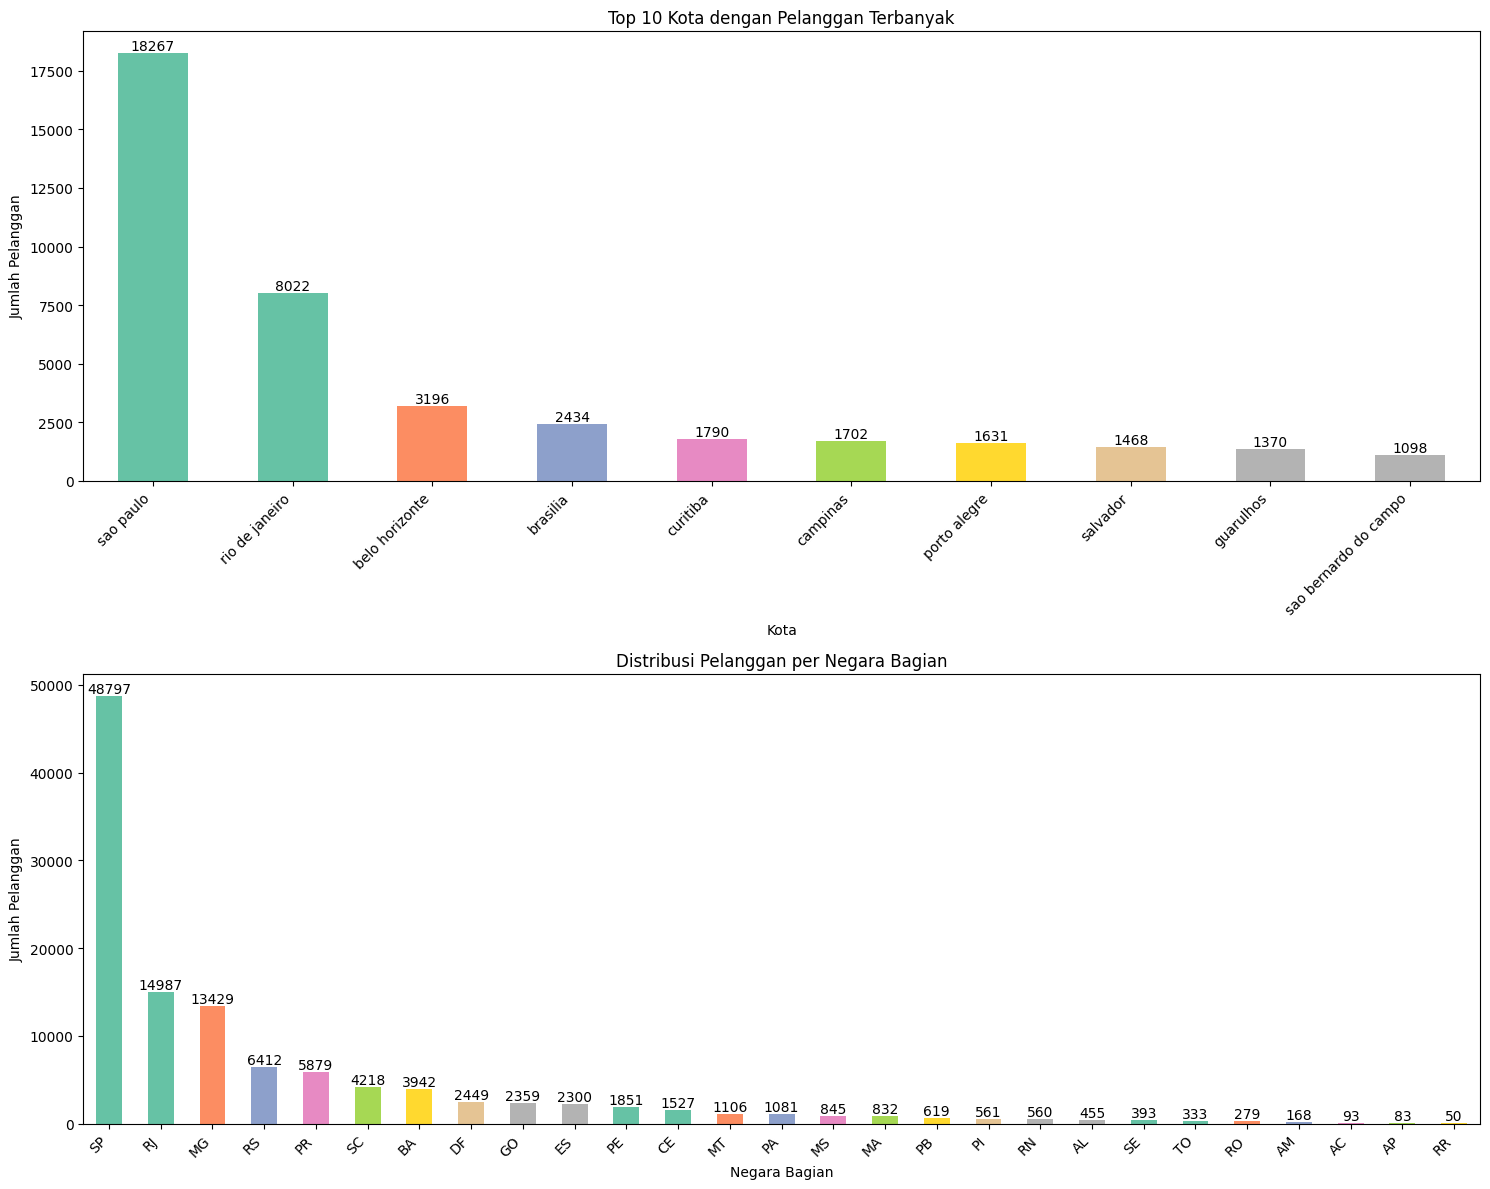

In [47]:
# Distribusi pelanggan per kota & negara bagian
customer_city_counts = merged_data['customer_city'].value_counts().head(10)
customer_state_counts = merged_data['customer_state'].value_counts()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
colors = plt.cm.Set2(np.linspace(0, 1, len(customer_city_counts)))

# Plot for Top 10 Cities
plt.sca(ax1)
bars1 = customer_city_counts.plot(kind='bar', color=colors)
plt.title('Top 10 Kota dengan Pelanggan Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars for cities
for i, v in enumerate(customer_city_counts):
    ax1.text(i, v, str(int(v)), ha='center', va='bottom')

# Plot for States
plt.sca(ax2)
bars2 = customer_state_counts.plot(kind='bar', color=colors)
plt.title('Distribusi Pelanggan per Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars for states
for i, v in enumerate(customer_state_counts):
    ax2.text(i, v, str(int(v)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Pertanyaan 2: Bagaimana tren penggunaan metode pembayaran pelanggan dari tahun 2016–2018, dan metode mana yang memberikan kontribusi terbesar terhadap total nilai transaksi?

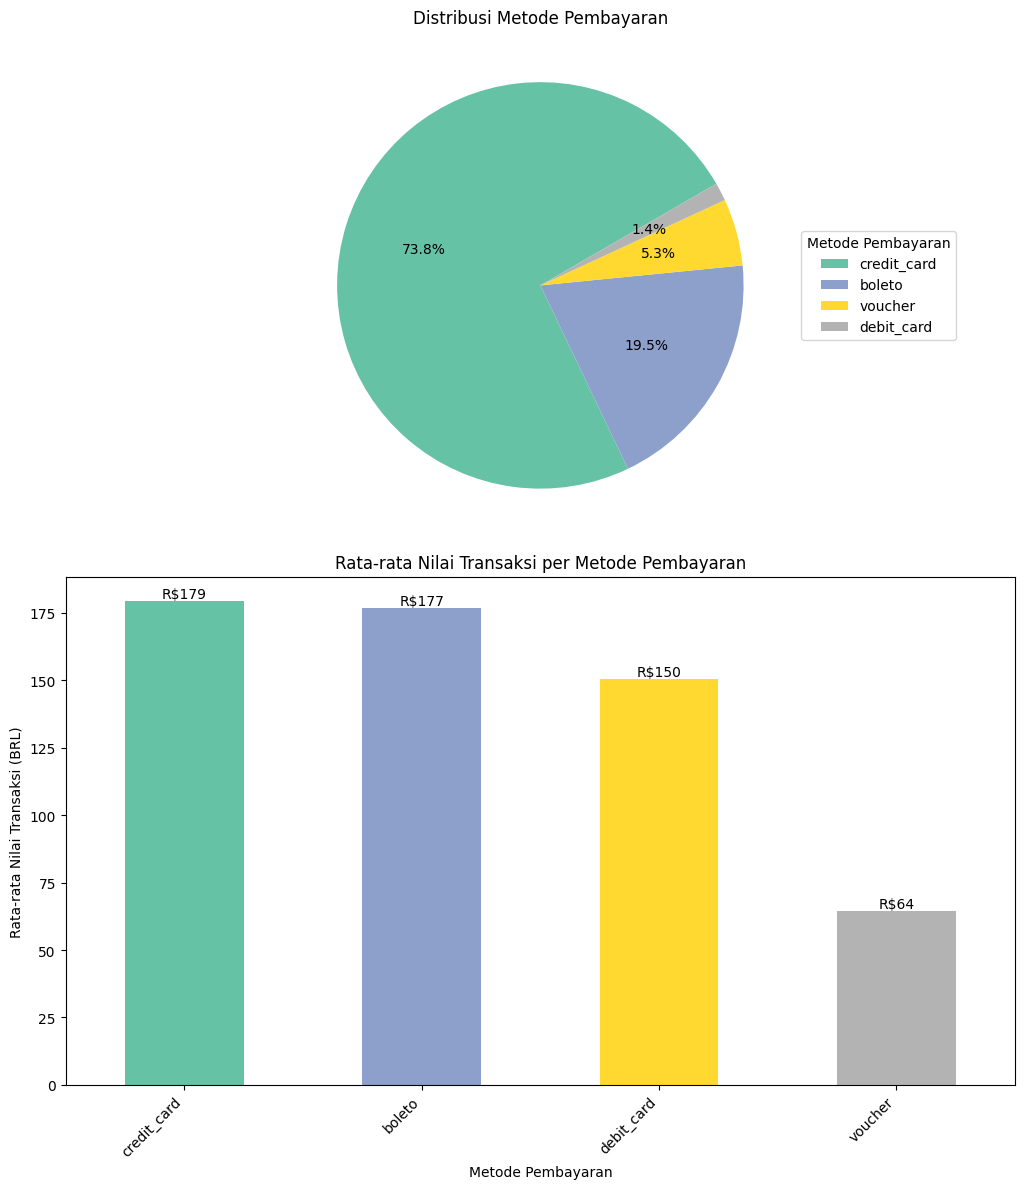

In [48]:
# Visualisasi tren metode pembayaran & kontribusi
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Pie chart untuk distribusi metode pembayaran
plt.sca(ax1)
payment_distribution = merged_data['payment_type'].value_counts(normalize=True) * 100
colors = plt.cm.Set2(np.linspace(0, 1, len(payment_distribution)))
wedges, texts, autotexts = ax1.pie(payment_distribution, 
                                  labels=None,  # Remove labels from pie
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=30)

# Add legend for pie chart
ax1.legend(wedges, payment_distribution.index,
          title="Metode Pembayaran",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title('Distribusi Metode Pembayaran')

# Bar chart untuk rata-rata nilai transaksi
plt.sca(ax2)
avg_payment_value = merged_data.groupby('payment_type', observed=True)['payment_value'].mean().sort_values(ascending=False)
bars = avg_payment_value.plot(kind='bar', color=colors)
plt.title('Rata-rata Nilai Transaksi per Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Rata-rata Nilai Transaksi (BRL)')
plt.xticks(rotation=45, ha='right')

# Menambahkan nilai di atas bar
for i, v in enumerate(avg_payment_value):
    ax2.text(i, v, f'R${v:,.0f}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Adjust subplot spacing to make room for legend
fig.subplots_adjust(right=0.85)
plt.show()

#### Pertanyaan 3 : Bagaimana tren jumlah pesanan per bulan selama periode 2016–2018, dan apakah terdapat pola musiman atau perubahan signifikan yang dapat menjadi dasar strategi promosi dan pengelolaan inventaris?

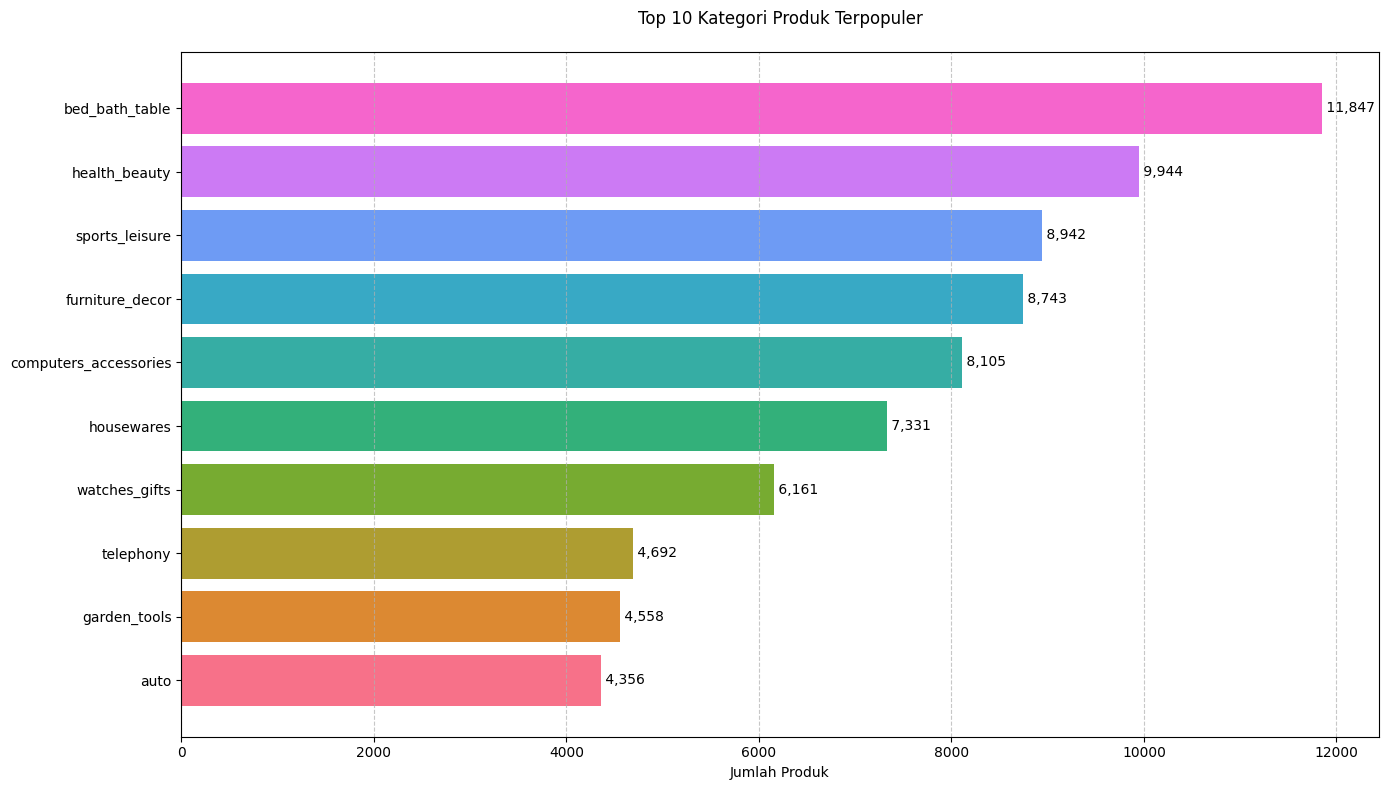

In [49]:
# Visualisasi Top 10 kategori produk paling populer
plt.figure(figsize=(14, 8))
top_categories = merged_data['product_category_name_english'].value_counts().head(10)
top_categories = top_categories.iloc[::-1]
colors = sns.color_palette("husl", len(top_categories))
bars = plt.barh(range(len(top_categories)), top_categories.values, color=colors)
for i, (value, category) in enumerate(zip(top_categories.values, top_categories.index)):
    plt.text(value, i, f' {value:,}', va='center')
plt.yticks(range(len(top_categories)), top_categories.index)
plt.xlabel('Jumlah Produk')
plt.title('Top 10 Kategori Produk Terpopuler', pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Pertanyaan 4 : Kategori produk apa yang paling populer selama periode 2016–2018, dan bagaimana perubahannya dari tahun ke tahun?

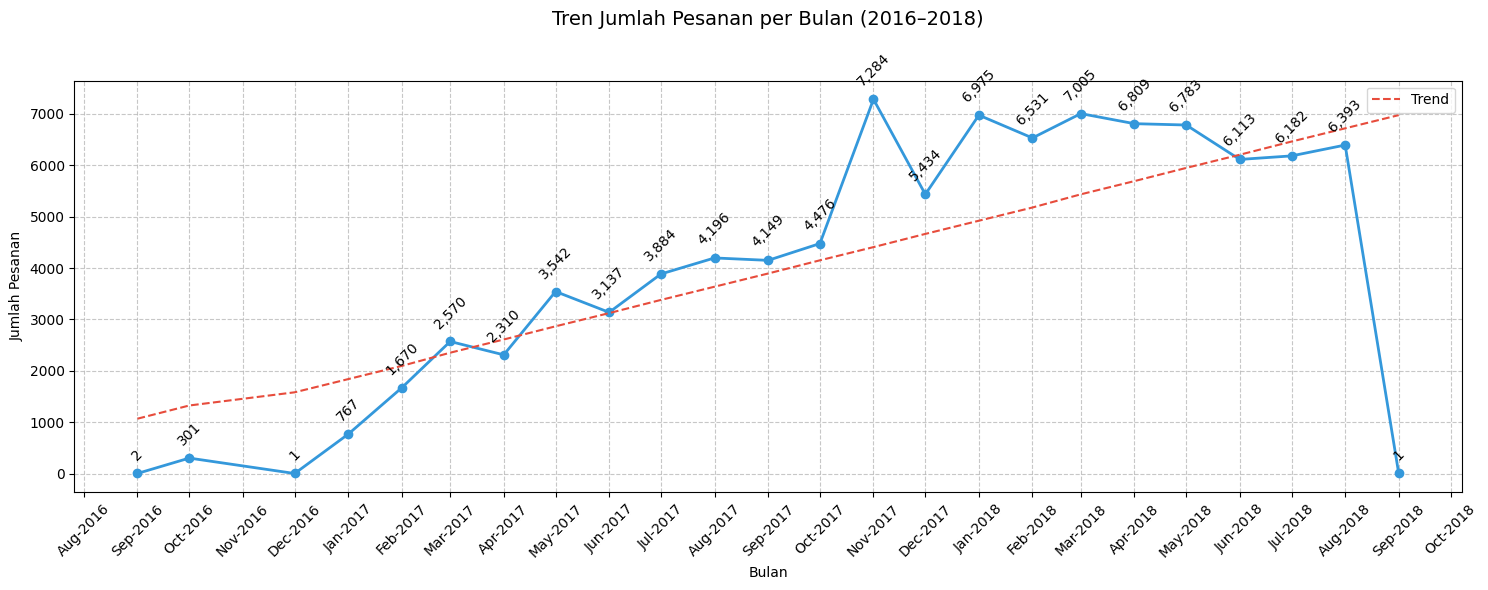

In [50]:
# Visualisasi tren jumlah pesanan per bulan dengan trend line
plt.figure(figsize=(15, 6))
orders_per_month.index = orders_per_month.index.astype(str).map(lambda x: pd.to_datetime(x + '-01'))

# Plot utama
plt.plot(orders_per_month.index, orders_per_month.values, marker='o', linewidth=2, color='#3498db')

# Trend line
z = np.polyfit(range(len(orders_per_month)), orders_per_month.values, 1)
p = np.poly1d(z)
plt.plot(orders_per_month.index, p(range(len(orders_per_month))), 
         linestyle='--', color='#e74c3c', label='Trend')

# Label tiap titik
for i, (date, value) in enumerate(zip(orders_per_month.index, orders_per_month.values)):
    plt.text(date, value + 200, f'{int(value):,}', ha='center', va='bottom', rotation=45)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Styling
plt.title('Tren Jumlah Pesanan per Bulan (2016–2018)', pad=40, fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Pertanyaan 5 : Berapa rata-rata waktu pengiriman dari pembelian hingga diterima pelanggan selama periode 2016–2018, dan apakah terdapat perbedaan signifikan antar kota atau wilayah?


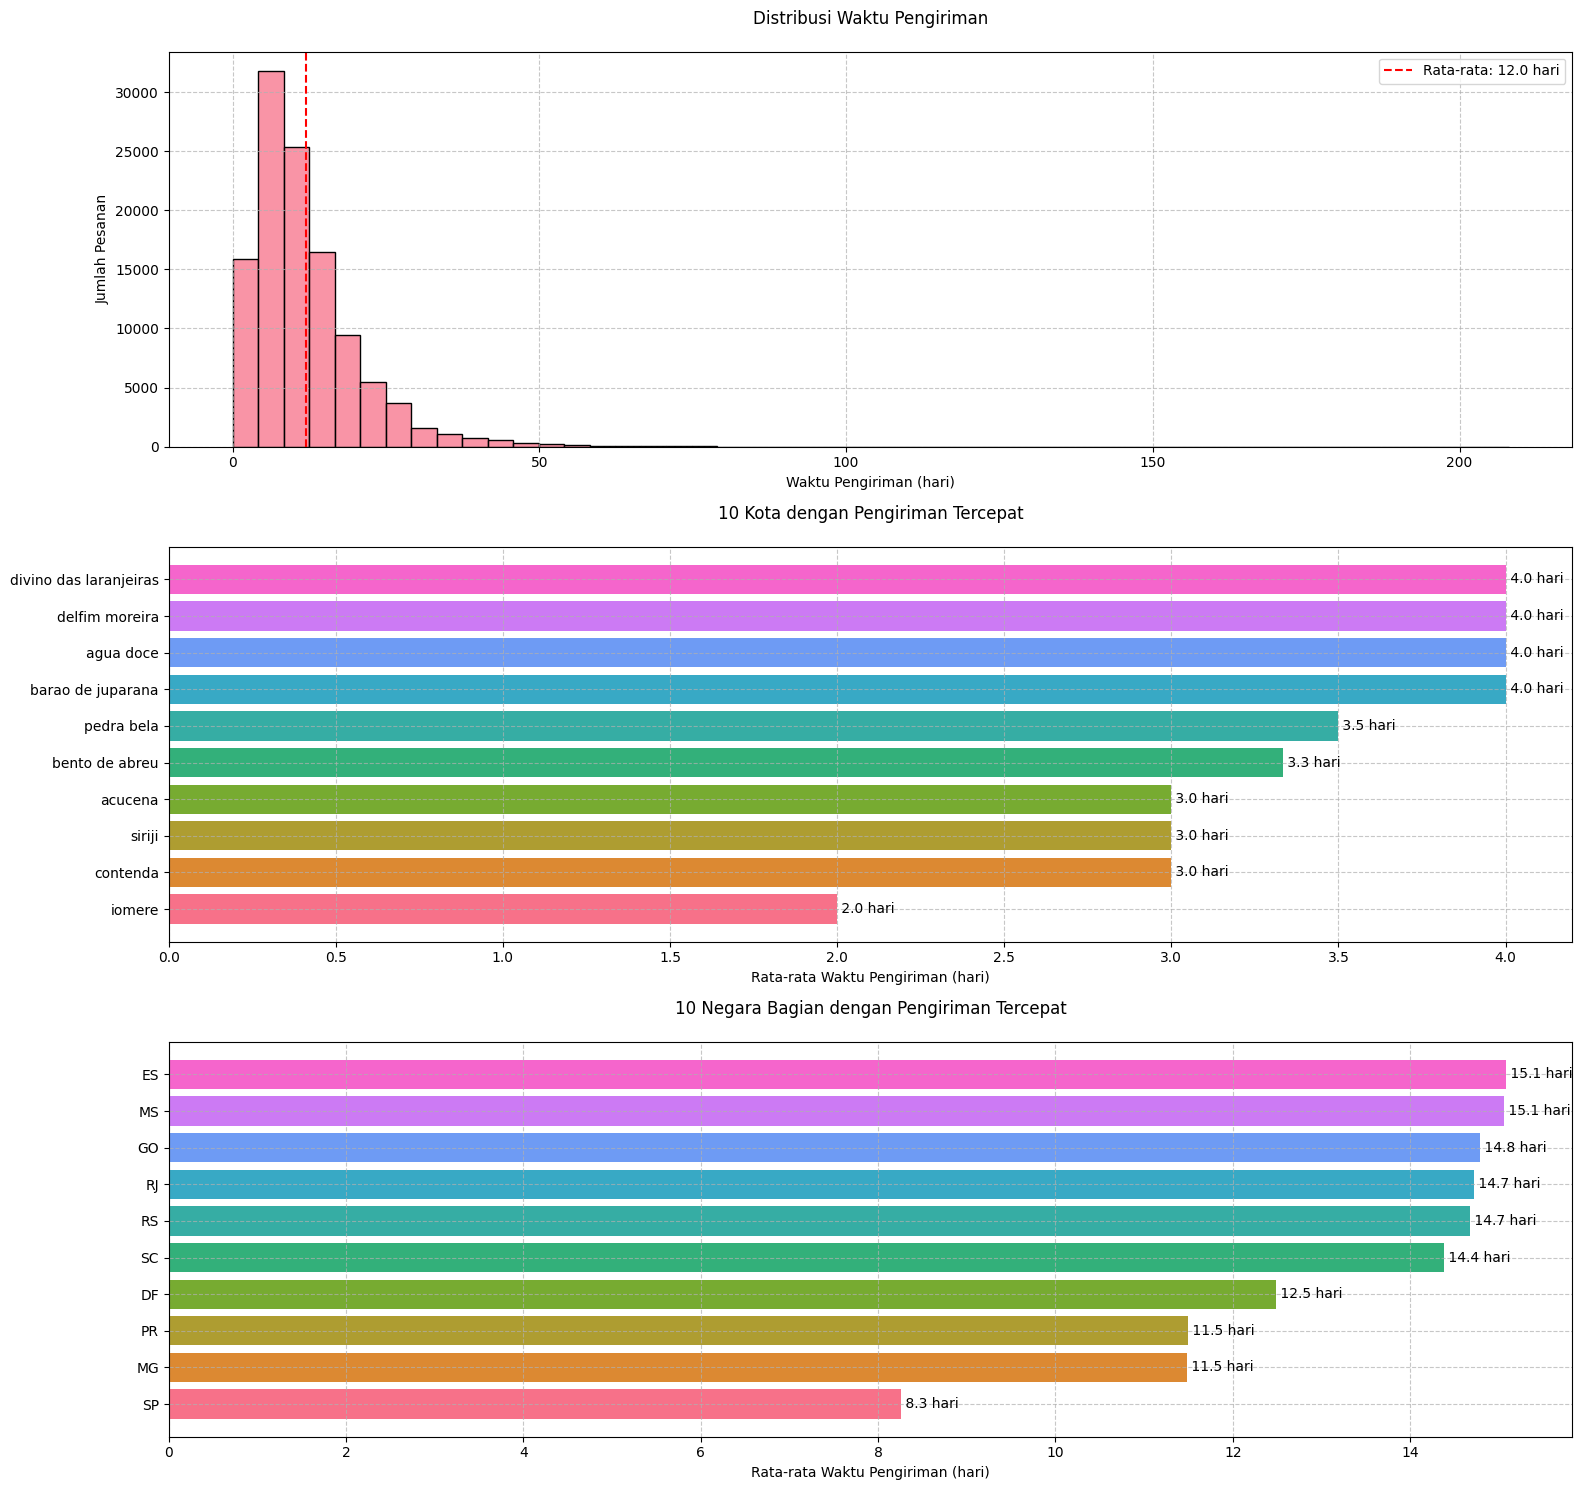

In [51]:
# Visualisasi waktu pengiriman
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 15))

# Plot 1: Histogram distribusi waktu pengiriman
colors = sns.color_palette("husl", len(top_categories))
sns.histplot(data=merged_data, x='delivery_time', bins=50, ax=ax1, color=colors[0])
ax1.axvline(avg_delivery_time, color='red', linestyle='--', label=f'Rata-rata: {avg_delivery_time:.1f} hari')
ax1.set_title('Distribusi Waktu Pengiriman', pad=20)
ax1.set_xlabel('Waktu Pengiriman (hari)')
ax1.set_ylabel('Jumlah Pesanan')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Top 10 kota tercepat
colors = sns.color_palette("husl", len(avg_delivery_by_city))
bars_cities = ax2.barh(range(len(avg_delivery_by_city)), avg_delivery_by_city.values, color=colors)
ax2.set_yticks(range(len(avg_delivery_by_city)))
ax2.set_yticklabels(avg_delivery_by_city.index)
ax2.set_title('10 Kota dengan Pengiriman Tercepat', pad=20)
ax2.set_xlabel('Rata-rata Waktu Pengiriman (hari)')
ax2.grid(True, linestyle='--', alpha=0.7)

# Menambahkan nilai pada bar kota
for i, v in enumerate(avg_delivery_by_city.values):
    ax2.text(v, i, f' {v:.1f} hari', va='center')

# Plot 3: Top 10 negara bagian tercepat
colors = sns.color_palette("husl", len(avg_delivery_by_state))
bars_states = ax3.barh(range(len(avg_delivery_by_state)), avg_delivery_by_state.values, color=colors)
ax3.set_yticks(range(len(avg_delivery_by_state)))
ax3.set_yticklabels(avg_delivery_by_state.index)
ax3.set_title('10 Negara Bagian dengan Pengiriman Tercepat', pad=20)
ax3.set_xlabel('Rata-rata Waktu Pengiriman (hari)')
ax3.grid(True, linestyle='--', alpha=0.7)

# Menambahkan nilai pada bar negara bagian
for i, v in enumerate(avg_delivery_by_state.values):
    ax3.text(v, i, f' {v:.1f} hari', va='center')

plt.tight_layout()
plt.show()

#### Pertanyaan 6 : Bagaimana distribusi skor ulasan pelanggan, dan apakah terdapat hubungan antara review_score dengan waktu pengiriman atau nilai transaksi?


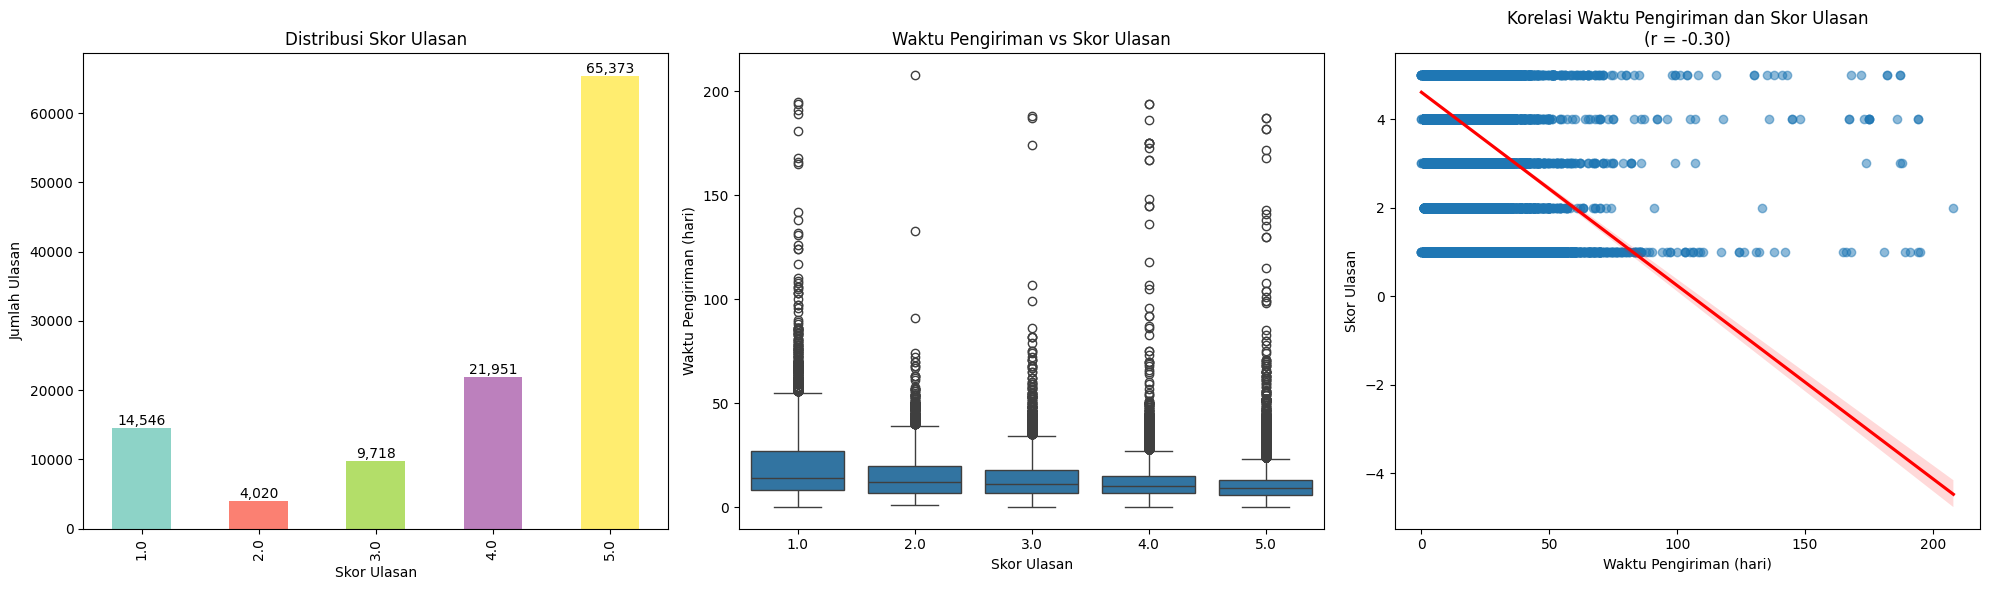

In [52]:
# Visualisasi distribusi skor ulasan dan korelasi dengan waktu pengiriman
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Bar plot distribusi skor ulasan
colors = plt.cm.Set3(np.linspace(0, 1, len(review_distribution)))
review_distribution.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Distribusi Skor Ulasan')
ax1.set_xlabel('Skor Ulasan')
ax1.set_ylabel('Jumlah Ulasan')

# Menambahkan label nilai di atas bar
for i, v in enumerate(review_distribution):
    ax1.text(i, v, f'{v:,}', ha='center', va='bottom')

# Plot 2: Box plot waktu pengiriman vs skor ulasan
sns.boxplot(data=merged_data, x='review_score', y='delivery_time', ax=ax2)
ax2.set_title('Waktu Pengiriman vs Skor Ulasan')
ax2.set_xlabel('Skor Ulasan')
ax2.set_ylabel('Waktu Pengiriman (hari)')

# Plot 3: Scatter plot dengan regression line
sns.regplot(data=merged_data, x='delivery_time', y='review_score', ax=ax3, 
            scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
ax3.set_title('Korelasi Waktu Pengiriman dan Skor Ulasan')
ax3.set_xlabel('Waktu Pengiriman (hari)')
ax3.set_ylabel('Skor Ulasan')

# Menambahkan koefisien korelasi ke judul
corr_coef = corr_review_delivery.iloc[0,1]
ax3.set_title(f'Korelasi Waktu Pengiriman dan Skor Ulasan\n(r = {corr_coef:.2f})')

# Mengatur layout
plt.tight_layout()
plt.show()

#### Pertanyaan 7 : Siapa penjual dengan total penjualan tertinggi selama periode 2016–2018, dan bagaimana rata-rata waktu pengiriman mereka dibandingkan penjual lainnya?


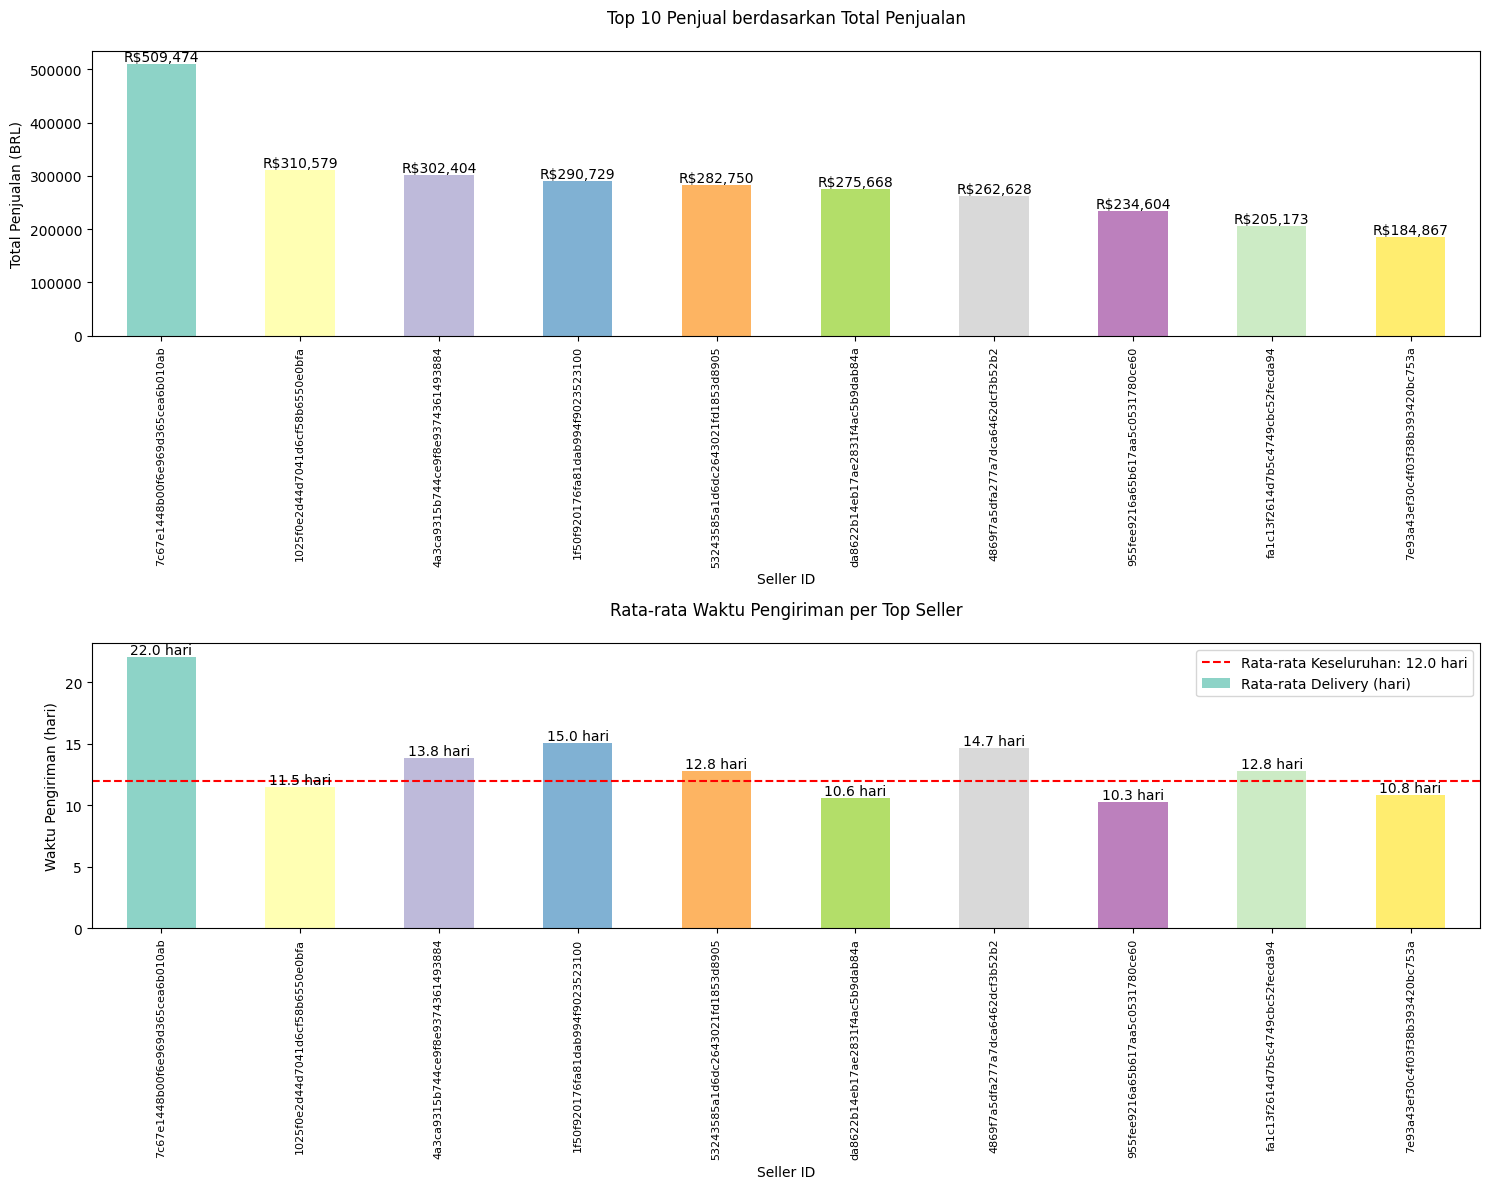

In [53]:
top_sellers = (
    merged_data.groupby('seller_id')['payment_value']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Membuat dataframe untuk tampilan yang lebih rapi
seller_performance = pd.DataFrame({
    'Total Penjualan (BRL)': top_sellers.values,
    'Rata-rata Delivery (hari)': merged_data[merged_data['seller_id'].isin(top_sellers.index)]
        .groupby('seller_id')['delivery_time']
        .mean()
        .reindex(top_sellers.index)
}) 
# Visualisasi top sellers dan performa pengiriman mereka
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
colors = plt.cm.Set3(np.linspace(0, 1, len(seller_performance)))

# Plot 1: Total Penjualan
seller_performance['Total Penjualan (BRL)'].plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Top 10 Penjual berdasarkan Total Penjualan', pad=20)
ax1.set_xlabel('Seller ID')
ax1.set_ylabel('Total Penjualan (BRL)')
ax1.tick_params(axis='x', rotation=90, labelsize=8)

# Menambahkan label nilai di atas bar
for i, v in enumerate(seller_performance['Total Penjualan (BRL)']):
    ax1.text(i, v, f'R${v:,.0f}', ha='center', va='bottom', rotation=0)

# Plot 2: Rata-rata Waktu Pengiriman
seller_performance['Rata-rata Delivery (hari)'].plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Rata-rata Waktu Pengiriman per Top Seller', pad=20)
ax2.set_xlabel('Seller ID')
ax2.set_ylabel('Waktu Pengiriman (hari)')
ax2.tick_params(axis='x', rotation=90, labelsize=8)

# Menambahkan garis rata-rata keseluruhan
overall_avg_delivery = merged_data['delivery_time'].mean()
ax2.axhline(y=overall_avg_delivery, color='red', linestyle='--', 
            label=f'Rata-rata Keseluruhan: {overall_avg_delivery:.1f} hari')
ax2.legend()

# Menambahkan label nilai di atas bar
for i, v in enumerate(seller_performance['Rata-rata Delivery (hari)']):
    ax2.text(i, v, f'{v:.1f} hari', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Pertanyaan 8 : Berapa proporsi pelanggan baru dibanding pelanggan yang melakukan pembelian ulang selama periode 2016–2018?


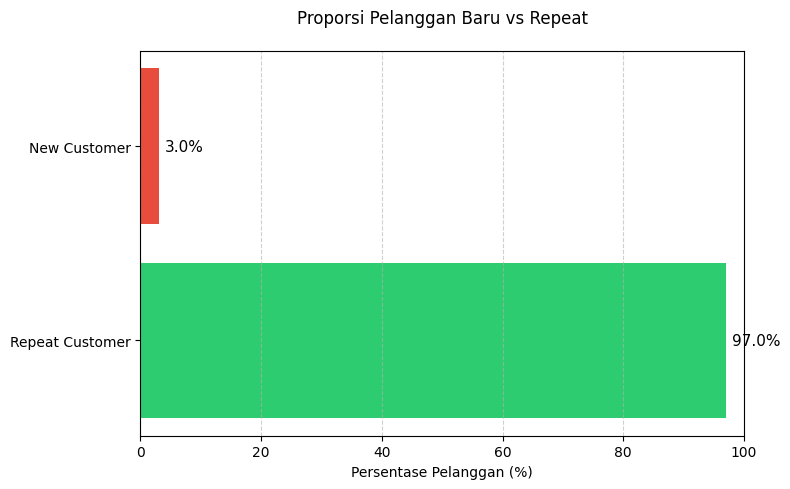

In [60]:
# Proporsi pelanggan baru vs repeat
purchase_count = merged_data.groupby('customer_unique_id')['order_id'].nunique()
new_vs_repeat = (purchase_count > 1).value_counts(normalize=True) * 100

# Siapkan data dan label
labels = ['Repeat Customer', 'New Customer'] if True in new_vs_repeat.index else ['New Customer', 'Repeat Customer']
values = new_vs_repeat.values

# Visualisasi Bar Chart
plt.figure(figsize=(8, 5))
bars = plt.barh(labels, values, color=['#2ecc71', '#e74c3c'])

# Label angka pada ujung bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center', fontsize=11)

plt.xlabel('Persentase Pelanggan (%)')
plt.title('Proporsi Pelanggan Baru vs Repeat', pad=20)
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Pertanyaan 9 : Bagaimana performa penjualan dan rata-rata nilai transaksi per negara bagian (state), dan wilayah mana yang berkontribusi paling besar terhadap total pendapatan?

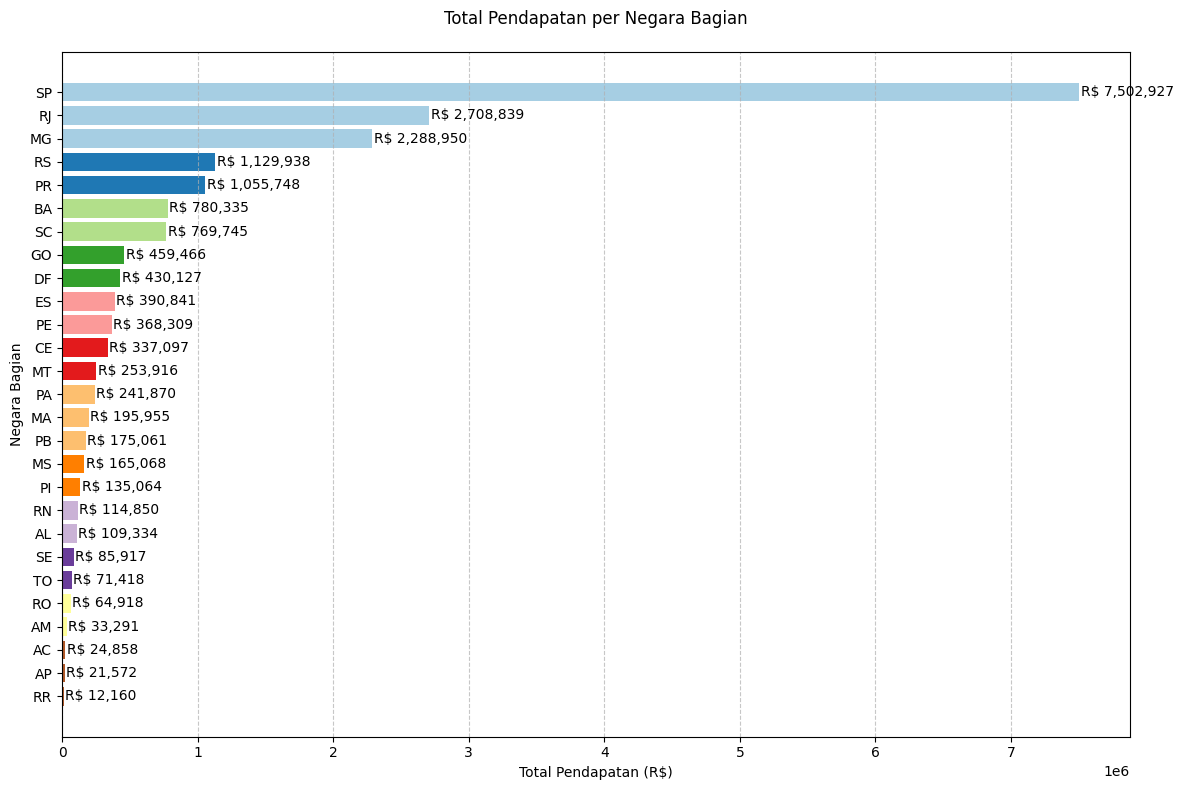

In [61]:
# Penjualan per negara bagian
revenue_by_state = (
    merged_data.groupby('customer_state', observed=True)['payment_value'].sum()
    .sort_values(ascending=False)
)

# Visualisasi Bar Chart Horizontal
plt.figure(figsize=(12, 8))
colors = plt.cm.Paired(np.linspace(0, 1, len(revenue_by_state)))

bars = plt.barh(revenue_by_state.index, revenue_by_state.values, color=colors)
plt.gca().invert_yaxis()  # Biar urutan terbesar di atas

# Tambahkan label nilai di ujung bar
for i, v in enumerate(revenue_by_state.values):
    plt.text(v + 10000, i, f'R$ {v:,.0f}', va='center', fontsize=10)

# Styling chart
plt.title('Total Pendapatan per Negara Bagian', pad=20)
plt.xlabel('Total Pendapatan (R$)')
plt.ylabel('Negara Bagian')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Pertanyaan 10 : Bagaimana segmentasi pelanggan berdasarkan analisis RFM (Recency, Frequency, Monetary) selama periode 2016–2018, dan segmen mana yang paling potensial untuk program retensi atau promosi loyalitas?

/tmp/ipykernel_6613/1066423246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


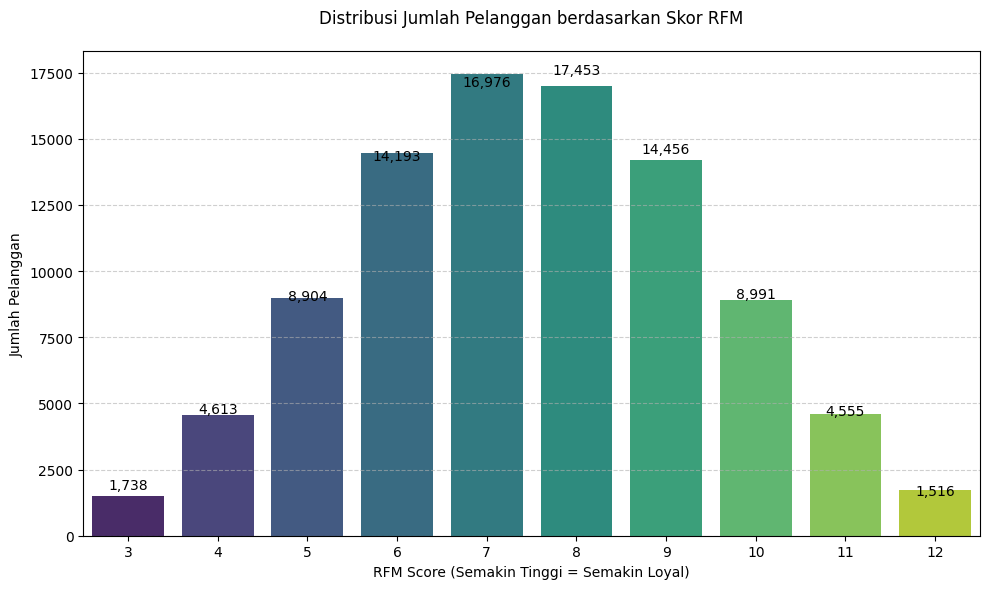

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=rfm_summary.index,
    y=rfm_summary['customer_count'],
    palette='viridis'
)

# Label jumlah pelanggan
for i, v in enumerate(rfm_summary['customer_count']):
    plt.text(i, v + 10, f'{int(v):,}', ha='center', fontsize=10)

plt.title('Distribusi Jumlah Pelanggan berdasarkan Skor RFM', pad=20)
plt.xlabel('RFM Score (Semakin Tinggi = Semakin Loyal)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipykernel_6613/2947753258.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm.pivot_table(index='F_Score', columns='R_Score', values='Monetary', aggfunc='mean'),


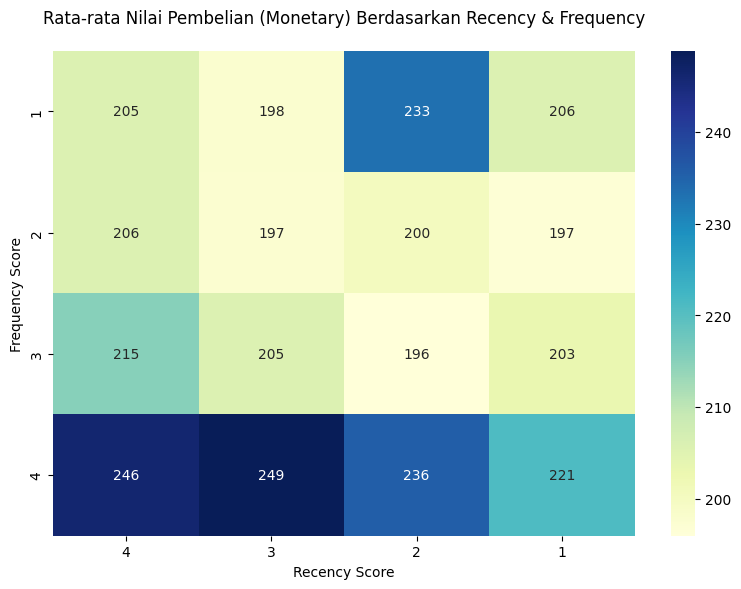

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(
    rfm.pivot_table(index='F_Score', columns='R_Score', values='Monetary', aggfunc='mean'),
    annot=True, fmt='.0f', cmap='YlGnBu'
)
plt.title('Rata-rata Nilai Pembelian (Monetary) Berdasarkan Recency & Frequency', pad=20)
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.tight_layout()
plt.show()


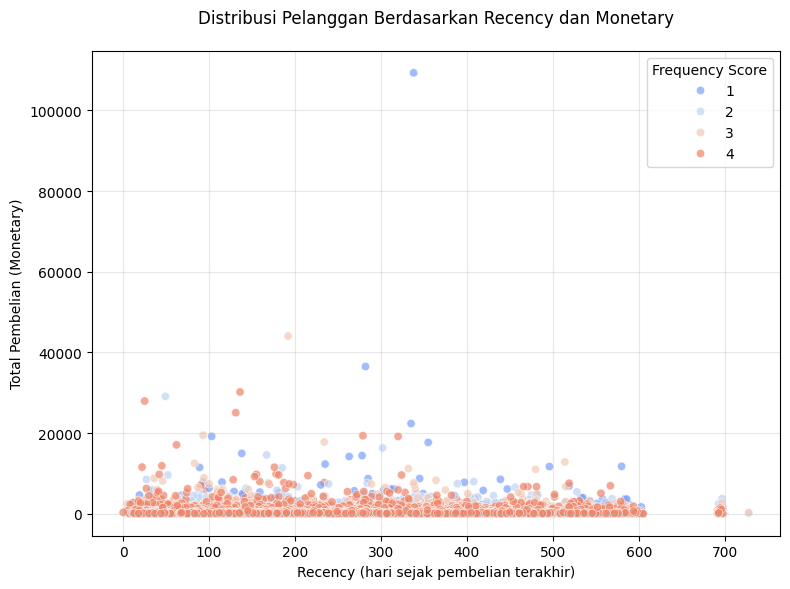

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm, 
    x='Recency', 
    y='Monetary',
    hue='F_Score', 
    palette='coolwarm', 
    alpha=0.7
)
plt.title('Distribusi Pelanggan Berdasarkan Recency dan Monetary', pad=20)
plt.xlabel('Recency (hari sejak pembelian terakhir)')
plt.ylabel('Total Pembelian (Monetary)')
plt.legend(title='Frequency Score')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Conclusion